In [35]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
def extract_color_histogram(image, bins=(8,8,8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0,1,2],None, bins, [0,180,0,256,0,256])
    return hist.flatten()

In [37]:
img = cv2.imread('tiger.jpg')
query_features = extract_color_histogram(img)

In [38]:
dataset = []
dataset.append(cv2.imread('tp.jpg'))
dataset.append(cv2.imread('fc.jpg'))
dataset.append(cv2.imread('lioness.jpg'))
dataset_features = [extract_color_histogram(image) for image in dataset]

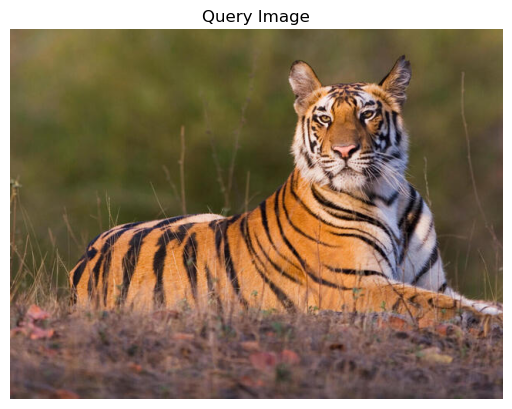

In [39]:
similarities = [cosine_similarity([query_features], [features])[0][0] for features in dataset_features]
ranked_indices = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Query Image')
plt.axis('off')
plt.show()

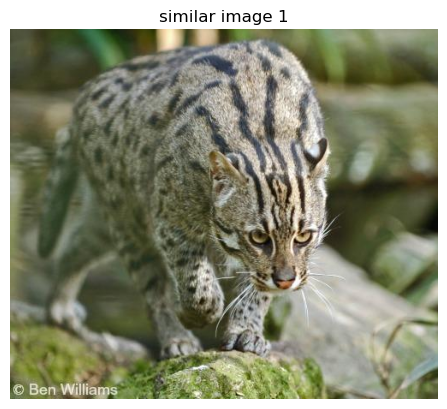

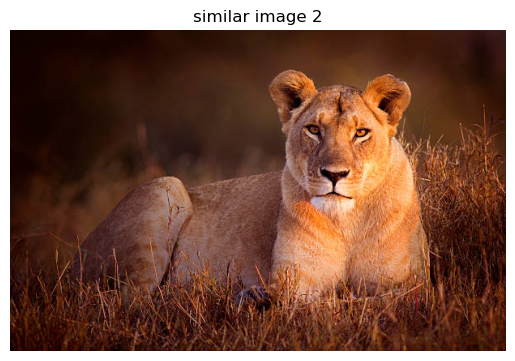

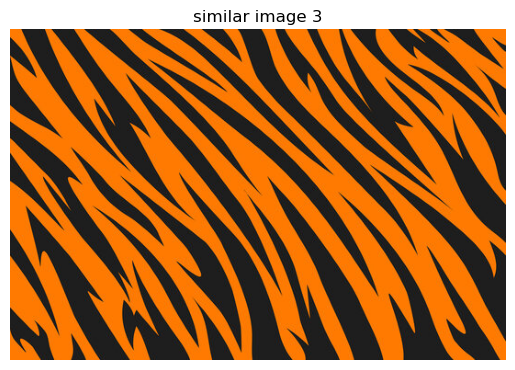

In [40]:
top_k = 3
for i in range(top_k): 
    similar_img = dataset[ranked_indices[i]]
    plt.figure()
    plt.imshow(cv2.cvtColor(similar_img, cv2.COLOR_BGR2RGB))
    plt.title(f"similar image {i+1}")
    plt.axis('off')
    plt.show()